# Dataset Features:

### Weather:The impact of weather conditions on the likelihood of accidents.

Clear: No adverse weather conditions.

Rainy: Rainy conditions increase the chance of accidents.

Foggy: Foggy conditions reduce visibility, increasing accident chances.

Snowy: Snow can cause slippery roads and higher accident probability.

Stormy: Stormy weather can create hazardous driving conditions.


### Road_Type: The type of road, influencing the probability of accidents.

Highway: High-speed roads with higher chances of severe accidents.

City Road: Roads within city limits, typically with more traffic and lower speeds.

Rural Road: Roads outside urban areas, often with fewer vehicles and lower speeds.

Mountain Road: Roads with curves and elevation changes, increasing accident risk.

### Time_of_Day: The time of day when the accident occurs.

Morning: The period between sunrise and noon.

Afternoon: The period between noon and evening.

Evening: The period just before sunset.

Night: The nighttime, often associated with reduced visibility and higher risk.

### Traffic_Density: The level of traffic on the road.

0: Low density (few vehicles).

1: Moderate density.

2: High density (many vehicles).

### Speed_Limit: The maximum allowed speed on the road.

### Number_of_Vehicles: The number of vehicles involved in the accident, ranging from 1 to 5.

### Driver_Alcohol: Whether the driver consumed alcohol.

0: No alcohol consumption.

1: Alcohol consumption (which increases the likelihood of an accident).

### Accident_Severity: The severity of the accident.

Low: Minor accident.

Moderate: Moderate accident with some damage or injuries.

High: Severe accident with significant damage or injuries.

### Road_Condition: The condition of the road surface.

Dry: Dry roads with minimal risk.

Wet: Wet roads due to rain, increasing the risk of accidents.

Icy: Ice on the road, significantly increasing the risk of accidents.

### Under Construction: Roads under construction, which may have obstacles or poor road quality.

### Vehicle_Type: The type of vehicle involved in the accident.

Car: A regular passenger car.

Truck: A large vehicle used for transporting goods.

Motorcycle: A two-wheeled motor vehicle.

Bus: A large vehicle used for public transportation.

Driver_Age: The age of the driver. Values range from 18 to 70 years old.

### Driver_Experience: The years of experience the driver has. Values range from 0 to 50 years of experience.

### Road_Light_Condition: The lighting conditions on the road.

Daylight: Daytime, when visibility is typically good.
Artificial Light: Road is illuminated with streetlights.
No Light: Road is not illuminated, typically during the night in poorly lit areas.

# Цель анализа:
---
Выявить основные причины и факторы, влияющие на вероятность дорожно-транспортных происшествий. Будет проанализировано влияние переменных, таких как погодные условия, тип дороги, ограничение скорости и другие.

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from io import StringIO

In [30]:
df = pd.read_csv('traffic_accidents.csv', encoding='utf-8')

# Вывод информации об исходной форме датасета
display(Markdown(f"### Исходная форма датасета: **{df.shape}**"))

# Удаление строк с пропущенными значениями
df.dropna(inplace=True)
display(Markdown(f"### Форма датасета после удаления пропусков: **{df.shape}**"))

# Просмотрим первые строки, общую информацию, описательную статистику и список столбцов.

display(Markdown("#### Первые 5 строк датасета:"))
display(df.head())

# Перехват информации, выводимой df.info()
buffer = StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()
display(Markdown("#### Информация о датасете:"))
print(info_str)


display(Markdown("#### Описательная статистика:"))
display(df.describe(include='all'))


display(Markdown("#### Список столбцов:"))
display(df.columns.tolist())

# ## Проверка на пропущенные значения и уникальность данных

display(Markdown("#### Количество пропущенных значений по столбцам:"))
display(df.isnull().sum())


display(Markdown("#### Количество уникальных значений по столбцам:"))
display(df.nunique())


display(Markdown("#### Распределение аварий по тяжести (Accident_Severity):"))
display(df['Accident_Severity'].value_counts())

# %% [markdown]


### Исходная форма датасета: **(840, 14)**

### Форма датасета после удаления пропусков: **(405, 14)**

#### Первые 5 строк датасета:

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0
6,Foggy,Highway,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Truck,27.0,26.0,Daylight,1.0
7,Rainy,City Road,Afternoon,0.0,60.0,4.0,0.0,Low,Dry,Car,29.0,22.0,Artificial Light,1.0


#### Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
Index: 405 entries, 2 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               405 non-null    object 
 1   Road_Type             405 non-null    object 
 2   Time_of_Day           405 non-null    object 
 3   Traffic_Density       405 non-null    float64
 4   Speed_Limit           405 non-null    float64
 5   Number_of_Vehicles    405 non-null    float64
 6   Driver_Alcohol        405 non-null    float64
 7   Accident_Severity     405 non-null    object 
 8   Road_Condition        405 non-null    object 
 9   Vehicle_Type          405 non-null    object 
 10  Driver_Age            405 non-null    float64
 11  Driver_Experience     405 non-null    float64
 12  Road_Light_Condition  405 non-null    object 
 13  Accident              405 non-null    float64
dtypes: float64(7), object(7)
memory usage: 47.5+ KB



#### Описательная статистика:

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
count,405,405,405,405.000000,405.000000,405.000000,405.00000,405,405,405,405.000000,405.000000,405,405.000000
unique,5,4,4,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,3,NaN
top,Clear,Highway,Afternoon,NaN,NaN,NaN,NaN,Low,Dry,Car,NaN,NaN,Artificial Light,NaN
freq,176,204,148,NaN,NaN,NaN,NaN,243,211,288,NaN,NaN,208,NaN
mean,NaN,NaN,NaN,1.022222,70.523457,3.276543,0.14321,NaN,NaN,NaN,43.854321,39.261728,NaN,0.293827
std,NaN,NaN,NaN,0.787904,32.062865,2.090186,0.35072,NaN,NaN,NaN,15.185357,15.392091,NaN,0.456077
min,NaN,NaN,NaN,0.000000,30.000000,1.000000,0.00000,NaN,NaN,NaN,18.000000,9.000000,NaN,0.000000
25%,NaN,NaN,NaN,0.000000,50.000000,2.000000,0.00000,NaN,NaN,NaN,31.000000,26.000000,NaN,0.000000
50%,NaN,NaN,NaN,1.000000,60.000000,3.000000,0.00000,NaN,NaN,NaN,43.000000,39.000000,NaN,0.000000
75%,NaN,NaN,NaN,2.000000,80.000000,4.000000,0.00000,NaN,NaN,NaN,57.000000,53.000000,NaN,1.000000


#### Список столбцов:

['Weather',
 'Road_Type',
 'Time_of_Day',
 'Traffic_Density',
 'Speed_Limit',
 'Number_of_Vehicles',
 'Driver_Alcohol',
 'Accident_Severity',
 'Road_Condition',
 'Vehicle_Type',
 'Driver_Age',
 'Driver_Experience',
 'Road_Light_Condition',
 'Accident']

#### Количество пропущенных значений по столбцам:

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64

#### Количество уникальных значений по столбцам:

Weather                  5
Road_Type                4
Time_of_Day              4
Traffic_Density          3
Speed_Limit             17
Number_of_Vehicles      10
Driver_Alcohol           2
Accident_Severity        3
Road_Condition           4
Vehicle_Type             4
Driver_Age              52
Driver_Experience       59
Road_Light_Condition     3
Accident                 2
dtype: int64

#### Распределение аварий по тяжести (Accident_Severity):

Accident_Severity
Low         243
Moderate    109
High         53
Name: count, dtype: int64

# Анализ взаимосвязей и применение различных методов

In [33]:

# %% [code]
# 1. Группировка по погоде и вычисление средней плотности трафика
weather_traffic = df.groupby('Weather')['Traffic_Density'].mean()
display(Markdown("**1. Средняя плотность трафика по погодным условиям:**"))
display(weather_traffic)

# 2. Корреляционная матрица для числовых переменных
corr_matrix = df.corr(numeric_only=True)
display(Markdown("**2. Корреляционная матрица:**"))
display(corr_matrix)

# 3. Сортировка датасета по ограничению скорости (Speed_Limit) и вывод топ-5 записей
sorted_speed = df.sort_values(by='Speed_Limit', ascending=False).head(5)
display(Markdown("**3. Топ-5 записей с максимальным значением Speed_Limit:**"))
display(sorted_speed)

# 4. Агрегация статистики для возраста водителя (Driver_Age)
age_stats = df['Driver_Age'].agg(['min', 'max', 'mean'])
display(Markdown("**4. Статистика по возрасту водителя:**"))
display(age_stats)

# 5. Случайная выборка из 5 строк
display(Markdown("**5. Случайные 5 записей:**"))
display(df.sample(5, random_state=42))

# 6. Подсчёт количества записей по типу дороги (Road_Type)
display(Markdown("**6. Распределение по типу дороги:**"))
display(df['Road_Type'].value_counts())

# 7. Подсчёт количества записей по времени суток (Time_of_Day)
display(Markdown("**7. Распределение по времени суток:**"))
display(df['Time_of_Day'].value_counts())

# 8. Статистика по количеству транспортных средств в авариях (Number_of_Vehicles)
display(Markdown("**8. Статистика по количеству транспортных средств:**"))
display(df['Number_of_Vehicles'].describe())

# 9. Средний опыт водителя (Driver_Experience) по типу транспортного средства (Vehicle_Type)
exp_by_vehicle = df.groupby('Vehicle_Type')['Driver_Experience'].mean()
display(Markdown("**9. Средний опыт водителя по типу транспортного средства:**"))
display(exp_by_vehicle)

# 10. Подсчёт аварий с участием водителей, употребляющих алкоголь (Driver_Alcohol)
display(Markdown("**10. Количество аварий с участием водителей, употребляющих алкоголь:**"))
display(df['Driver_Alcohol'].value_counts())

# 11. Группировка по состоянию дороги (Road_Condition) для подсчёта количества записей
road_cond_counts = df['Road_Condition'].value_counts()
display(Markdown("**11. Распределение состояний дороги:**"))
display(road_cond_counts)

# 12. Pivot table: среднее количество транспортных средств по типу дороги и погоде
pivot_table = pd.pivot_table(df, values='Number_of_Vehicles', index='Road_Type', columns='Weather', aggfunc="mean")
display(Markdown("**12. Pivot table: среднее количество транспортных средств по типу дороги и погоде:**"))
display(pivot_table)

# 13. Агрегирование нескольких статистик для Traffic_Density
traffic_agg = df['Traffic_Density'].agg(['min', 'max', 'mean', 'median', 'std'])
display(Markdown("**13. Агрегированная статистика для Traffic_Density:**"))
display(traffic_agg)

# 14. Случайный выбор 3 строк
display(Markdown("**14. Случайные 3 строки:**"))
display(df.sample(3, random_state=101))

# 15. Количество уникальных значений в столбце Road_Light_Condition
display(Markdown("**15. Количество уникальных значений в Road_Light_Condition:**"))
display(df['Road_Light_Condition'].nunique())

# 16. Уникальные значения в столбце Time_of_Day
display(Markdown("**16. Уникальные значения в Time_of_Day:**"))
display(df['Time_of_Day'].unique())

# 17. Описательная статистика для Accident_Severity
display(Markdown("**17. Описательная статистика для Accident_Severity:**"))
display(df['Accident_Severity'].describe())

# 18. Группировка по Road_Type с подсчётом количества аварий
accidents_by_road = df.groupby('Road_Type')['Accident'].count()
display(Markdown("**18. Количество аварий по типу дороги:**"))
display(accidents_by_road)

# 19. Сортировка значений агрегации аварий по типу дороги
sorted_accidents = accidents_by_road.sort_values(ascending=False)
display(Markdown("**19. Топ-значения по количеству аварий по типу дороги:**"))
display(sorted_accidents)

# 20. Агрегация по группам для вычисления суммарного количества транспортных средств по типу дороги
vehicles_sum = df.groupby('Road_Type')['Number_of_Vehicles'].sum()
display(Markdown("**20. Суммарное количество транспортных средств по типу дороги:**"))
display(vehicles_sum)

**1. Средняя плотность трафика по погодным условиям:**

Weather
Clear     0.988636
Foggy     0.830189
Rainy     1.017857
Snowy     1.400000
Stormy    1.000000
Name: Traffic_Density, dtype: float64

**2. Корреляционная матрица:**

,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Driver_Age,Driver_Experience,Accident
Traffic_Density,1.000000,-0.064345,-0.045825,-0.011545,0.031097,0.030135,-0.031992
Speed_Limit,-0.064345,1.000000,0.512110,-0.009324,-0.005659,-0.010269,0.037021
Number_of_Vehicles,-0.045825,0.512110,1.000000,0.050515,0.029815,0.026365,0.122275
Driver_Alcohol,-0.011545,-0.009324,0.050515,1.000000,0.017405,0.022843,-0.016124
Driver_Age,0.031097,-0.005659,0.029815,0.017405,1.000000,0.982524,0.058734
Driver_Experience,0.030135,-0.010269,0.026365,0.022843,0.982524,1.000000,0.053896
Accident,-0.031992,0.037021,0.122275,-0.016124,0.058734,0.053896,1.000000


**3. Топ-5 записей с максимальным значением Speed_Limit:**

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
604,Rainy,City Road,Evening,1.0,213.0,14.0,0.0,Low,Dry,Car,59.0,58.0,No Light,0.0
164,Clear,City Road,Afternoon,0.0,213.0,11.0,0.0,Low,Dry,Motorcycle,65.0,56.0,Daylight,1.0
714,Rainy,Mountain Road,Evening,0.0,212.0,10.0,0.0,Low,Wet,Truck,27.0,27.0,Artificial Light,0.0
667,Clear,City Road,Morning,2.0,198.0,11.0,0.0,Low,Under Construction,Car,62.0,60.0,Artificial Light,0.0
213,Rainy,Highway,Evening,1.0,196.0,11.0,0.0,Moderate,Icy,Car,38.0,32.0,Daylight,0.0


**4. Статистика по возрасту водителя:**

min     18.000000
max     69.000000
mean    43.854321
Name: Driver_Age, dtype: float64

**5. Случайные 5 записей:**

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
138,Foggy,City Road,Afternoon,0.0,100.0,4.0,0.0,High,Dry,Truck,63.0,62.0,Artificial Light,1.0
465,Foggy,Highway,Afternoon,0.0,80.0,2.0,0.0,Low,Wet,Car,40.0,36.0,Daylight,0.0
805,Foggy,Rural Road,Evening,0.0,50.0,1.0,0.0,Low,Dry,Car,23.0,17.0,Daylight,0.0
71,Foggy,Highway,Evening,2.0,30.0,5.0,0.0,High,Wet,Car,35.0,26.0,Artificial Light,1.0
87,Snowy,Highway,Night,2.0,50.0,4.0,0.0,High,Dry,Bus,21.0,14.0,Daylight,0.0


**6. Распределение по типу дороги:**

Road_Type
Highway          204
City Road        120
Rural Road        57
Mountain Road     24
Name: count, dtype: int64

**7. Распределение по времени суток:**

Time_of_Day
Afternoon    148
Evening      103
Morning       97
Night         57
Name: count, dtype: int64

**8. Статистика по количеству транспортных средств:**

count    405.000000
mean       3.276543
std        2.090186
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       14.000000
Name: Number_of_Vehicles, dtype: float64

**9. Средний опыт водителя по типу транспортного средства:**

Vehicle_Type
Bus           39.625000
Car           38.961806
Motorcycle    40.978261
Truck         39.290909
Name: Driver_Experience, dtype: float64

**10. Количество аварий с участием водителей, употребляющих алкоголь:**

Driver_Alcohol
0.0    347
1.0     58
Name: count, dtype: int64

**11. Распределение состояний дороги:**

Road_Condition
Dry                   211
Icy                    81
Wet                    71
Under Construction     42
Name: count, dtype: int64

**12. Pivot table: среднее количество транспортных средств по типу дороги и погоде:**

Weather,Clear,Foggy,Rainy,Snowy,Stormy
Road_Type,,,,,
City Road,3.166667,3.35000,3.275862,2.300000,5.285714
Highway,3.395604,3.26087,3.122807,3.043478,4.000000
Mountain Road,3.125000,4.50000,3.888889,3.000000,3.000000
Rural Road,3.043478,2.50000,3.117647,3.500000,2.000000


**13. Агрегированная статистика для Traffic_Density:**

min       0.000000
max       2.000000
mean      1.022222
median    1.000000
std       0.787904
Name: Traffic_Density, dtype: float64

**14. Случайные 3 строки:**

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
415,Clear,Highway,Afternoon,0.0,100.0,5.0,0.0,Moderate,Dry,Car,43.0,41.0,Daylight,0.0
88,Clear,Highway,Evening,2.0,60.0,5.0,1.0,Moderate,Icy,Car,68.0,65.0,Artificial Light,0.0
211,Rainy,City Road,Night,2.0,100.0,3.0,0.0,Moderate,Under Construction,Car,44.0,37.0,Daylight,0.0


**15. Количество уникальных значений в Road_Light_Condition:**

3

**16. Уникальные значения в Time_of_Day:**

array(['Evening', 'Afternoon', 'Morning', 'Night'], dtype=object)

**17. Описательная статистика для Accident_Severity:**

count     405
unique      3
top       Low
freq      243
Name: Accident_Severity, dtype: object

**18. Количество аварий по типу дороги:**

Road_Type
City Road        120
Highway          204
Mountain Road     24
Rural Road        57
Name: Accident, dtype: int64

**19. Топ-значения по количеству аварий по типу дороги:**

Road_Type
Highway          204
City Road        120
Rural Road        57
Mountain Road     24
Name: Accident, dtype: int64

**20. Суммарное количество транспортных средств по типу дороги:**

Road_Type
City Road        393.0
Highway          672.0
Mountain Road     87.0
Rural Road       175.0
Name: Number_of_Vehicles, dtype: float64

# Визуализация результатов анализа
---

C:\Users\kombi\AppData\Local\Temp\ipykernel_9572\433769388.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Accident_Severity', palette='viridis')


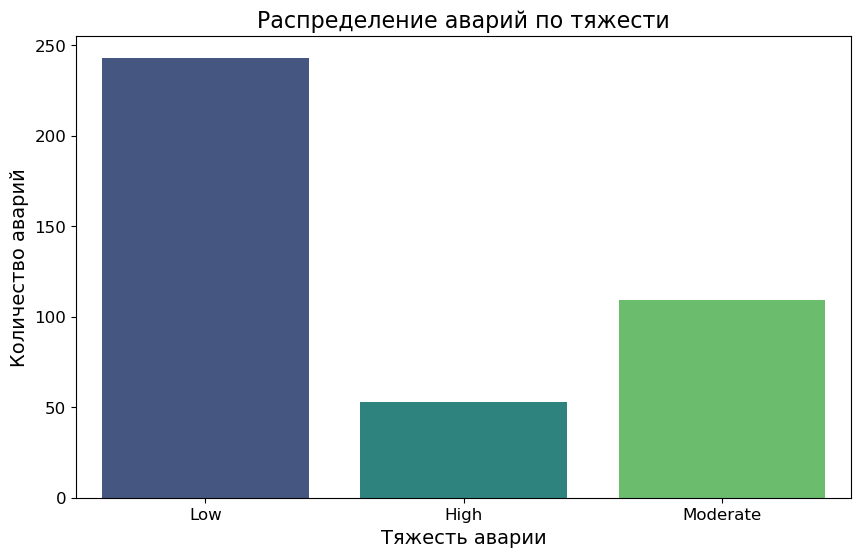

C:\Users\kombi\AppData\Local\Temp\ipykernel_9572\433769388.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_traffic.index, y=weather_traffic.values, palette='coolwarm')


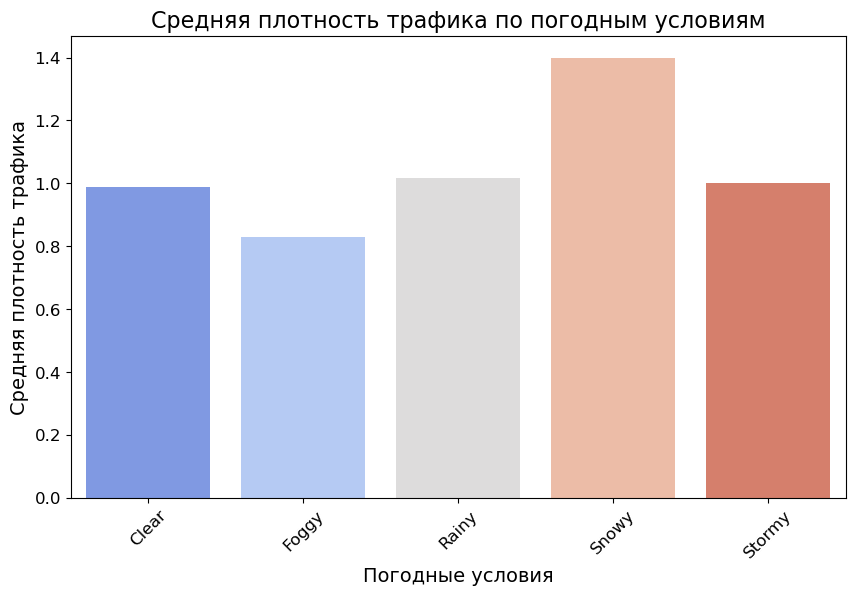

C:\Users\kombi\AppData\Local\Temp\ipykernel_9572\433769388.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Accident_Severity', y='Driver_Age', palette='Set2')


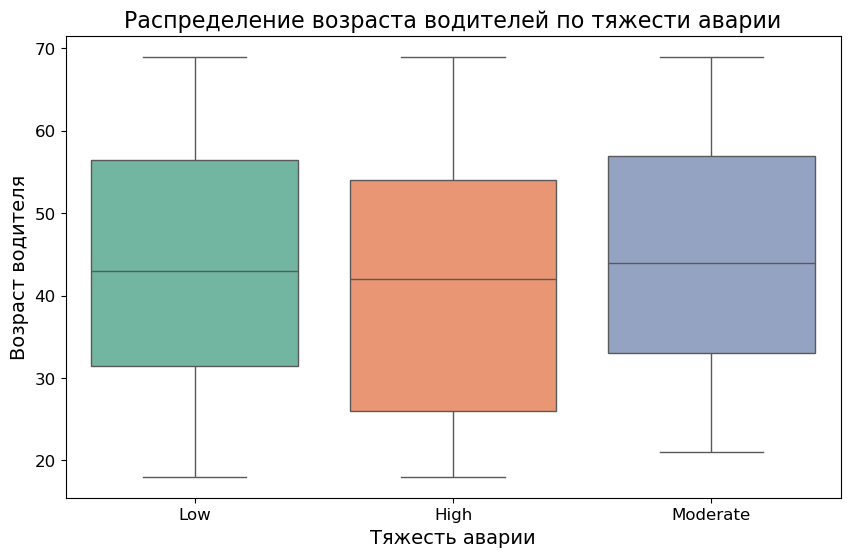

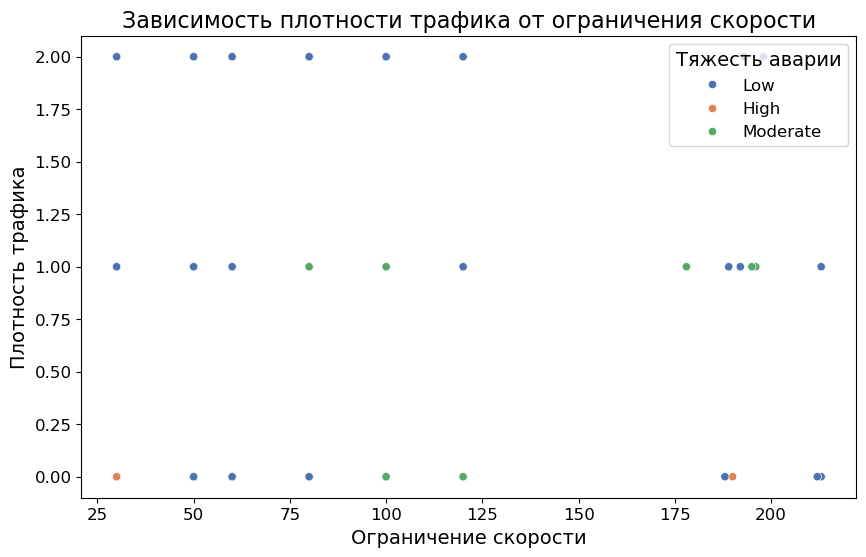

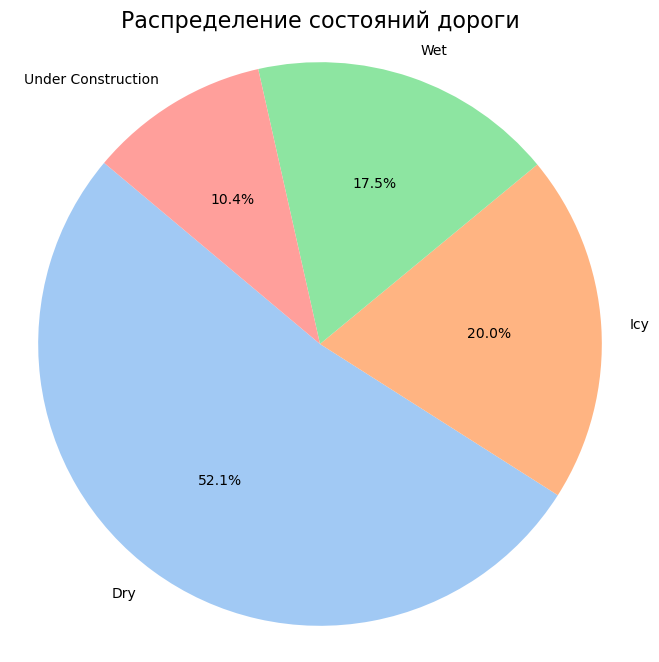

In [28]:
# Визуализация 1. Count Plot – распределение аварий по тяжести
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Accident_Severity', palette='viridis')
plt.title("Распределение аварий по тяжести", fontsize=16)
plt.xlabel("Тяжесть аварии", fontsize=14)
plt.ylabel("Количество аварий", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Визуализация 2. Bar Plot – средняя плотность трафика по погодным условиям
plt.figure(figsize=(10,6))
sns.barplot(x=weather_traffic.index, y=weather_traffic.values, palette='coolwarm')
plt.title("Средняя плотность трафика по погодным условиям", fontsize=16)
plt.xlabel("Погодные условия", fontsize=14)
plt.ylabel("Средняя плотность трафика", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

# Визуализация 3. Box Plot – распределение возраста водителей по тяжести аварии
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Accident_Severity', y='Driver_Age', palette='Set2')
plt.title("Распределение возраста водителей по тяжести аварии", fontsize=16)
plt.xlabel("Тяжесть аварии", fontsize=14)
plt.ylabel("Возраст водителя", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Визуализация 4. Scatter Plot – зависимость плотности трафика от ограничения скорости
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Speed_Limit', y='Traffic_Density', hue='Accident_Severity', palette='deep')
plt.title("Зависимость плотности трафика от ограничения скорости", fontsize=16)
plt.xlabel("Ограничение скорости", fontsize=14)
plt.ylabel("Плотность трафика", fontsize=14)
plt.legend(title='Тяжесть аварии', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Визуализация 5. Pie Chart – распределение состояний дороги (Road_Condition)
road_cond_counts = df['Road_Condition'].value_counts()
colors = sns.color_palette('pastel')[:len(road_cond_counts)]
plt.figure(figsize=(8,8))
plt.pie(road_cond_counts.values, labels=road_cond_counts.index, colors=colors,
        autopct='%.1f%%', startangle=140)
plt.title("Распределение состояний дороги", fontsize=16)
plt.axis('equal')
plt.show()


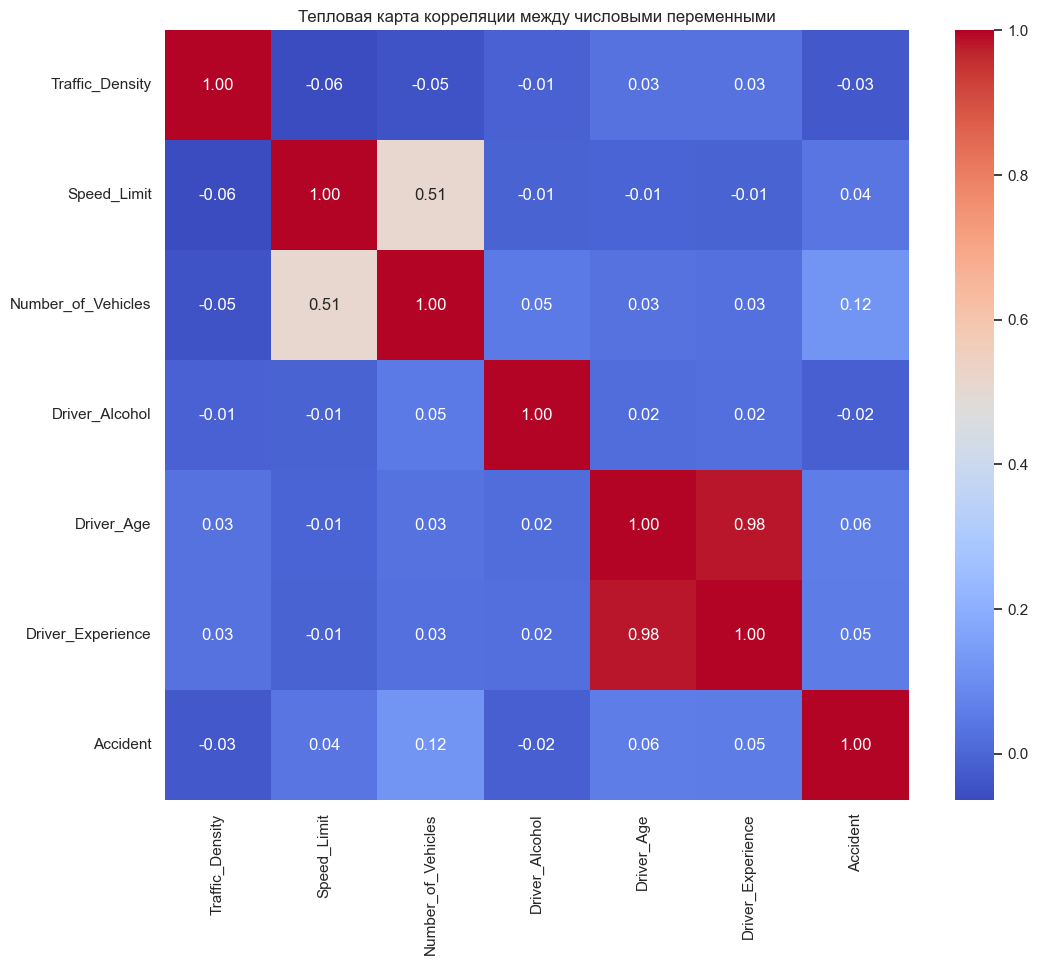

/var/folders/ml/970lk12n6vgbhmc3_y1j8z040000gn/T/ipykernel_78654/2973525235.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Accident_Severity', y='Driver_Age', palette='Set3')


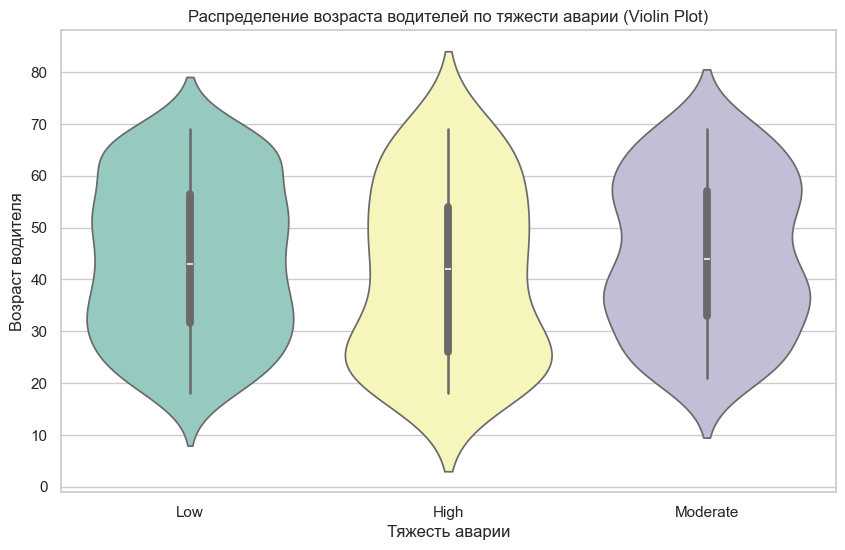

/var/folders/ml/970lk12n6vgbhmc3_y1j8z040000gn/T/ipykernel_78654/2973525235.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='Vehicle_Type', y='Driver_Experience', palette='Spectral')


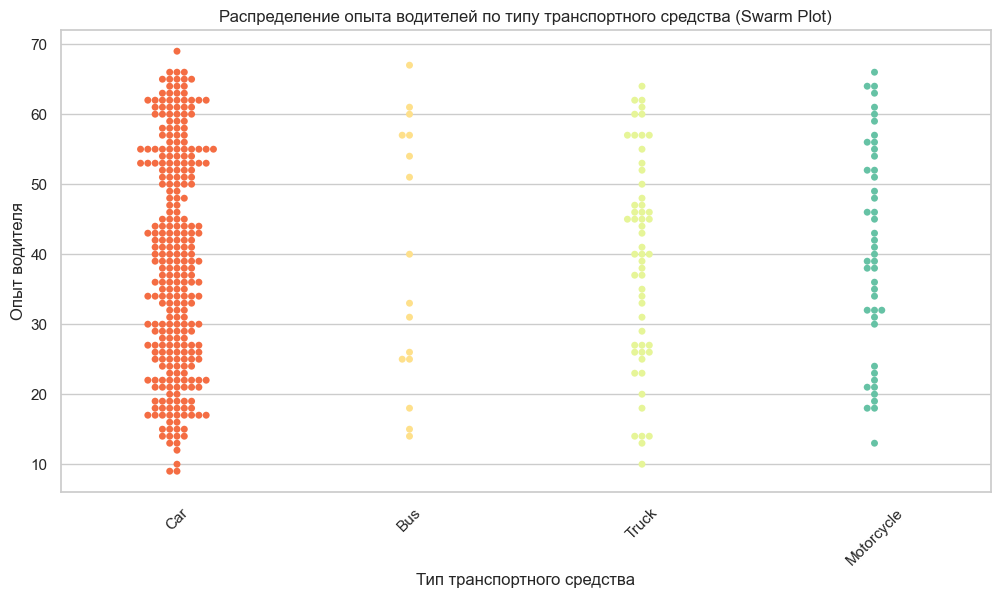

In [4]:

# 1. Тепловая карта корреляции между числовыми переменными
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Тепловая карта корреляции между числовыми переменными")
# Как читать: яркие и насыщенные цвета (близкие к 1 или -1) указывают на сильную положительную или отрицательную корреляцию.
plt.show()


# %% [code]
# 3. Виолончельный график распределения возраста водителей по тяжести аварии
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Accident_Severity', y='Driver_Age', palette='Set3')
plt.title("Распределение возраста водителей по тяжести аварии (Violin Plot)")
plt.xlabel("Тяжесть аварии")
plt.ylabel("Возраст водителя")
# Как читать: ширина "виолончели" указывает на плотность распределения возрастов для каждой категории аварий; медиана и выбросы также видны.
plt.show()


# %% [code]
# 5. Swarm plot для распределения опыта водителей по типу транспортного средства
plt.figure(figsize=(12,6))
sns.swarmplot(data=df, x='Vehicle_Type', y='Driver_Experience', palette='Spectral')
plt.title("Распределение опыта водителей по типу транспортного средства (Swarm Plot)")
plt.xlabel("Тип транспортного средства")
plt.ylabel("Опыт водителя")
plt.xticks(rotation=45)
# Как читать: точки показывают отдельные наблюдения, что позволяет увидеть разброс значений и выявить кластеры или выбросы для каждого типа транспорта.
plt.show()


/var/folders/ml/970lk12n6vgbhmc3_y1j8z040000gn/T/ipykernel_78654/182108153.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_speed_by_road.index, y=avg_speed_by_road.values, palette='magma')


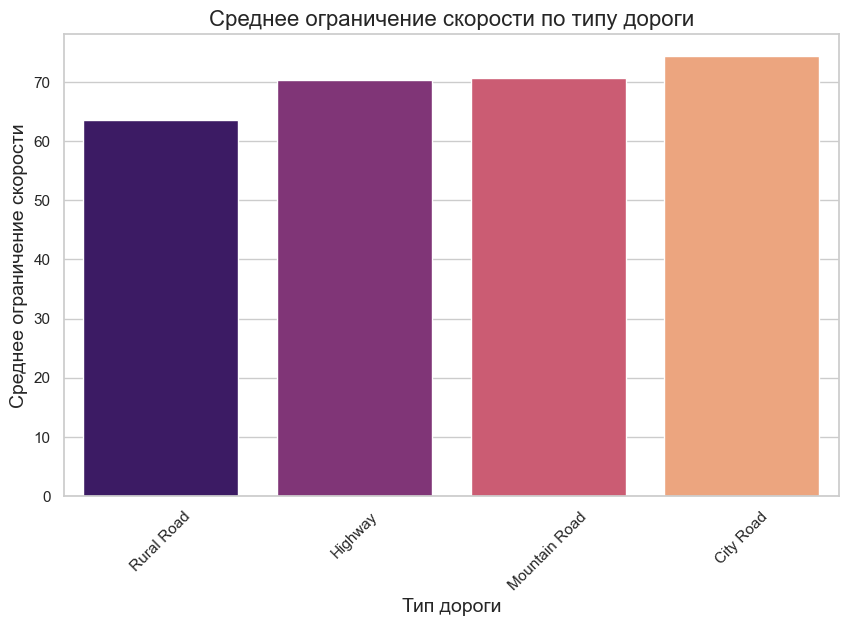

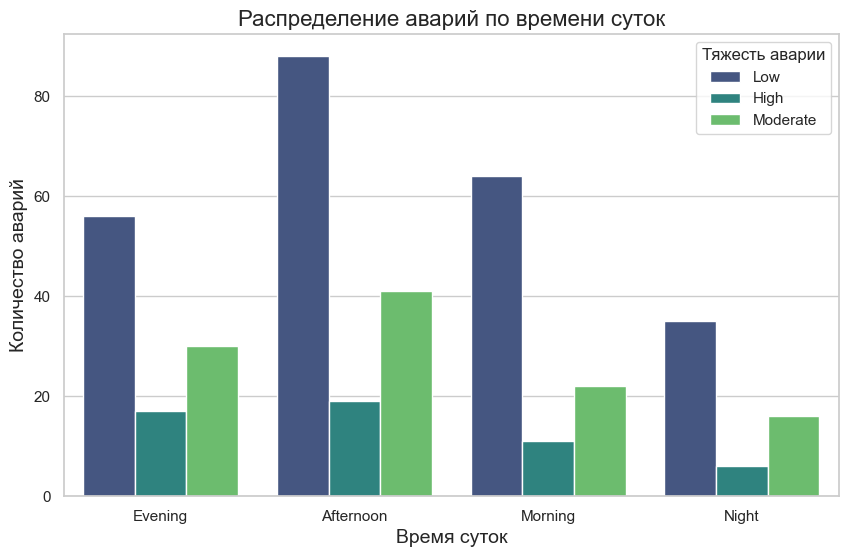

/var/folders/ml/970lk12n6vgbhmc3_y1j8z040000gn/T/ipykernel_78654/182108153.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Accident_Severity', y='Driver_Experience', palette='Set2')


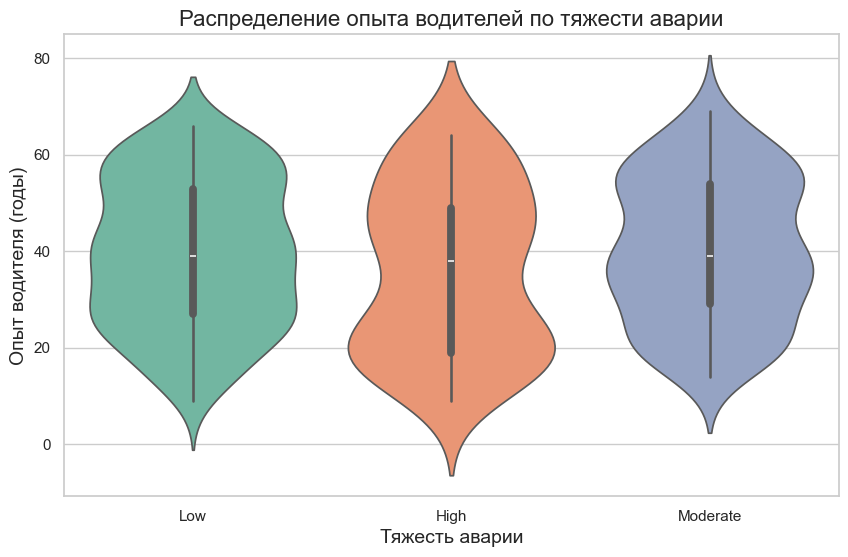

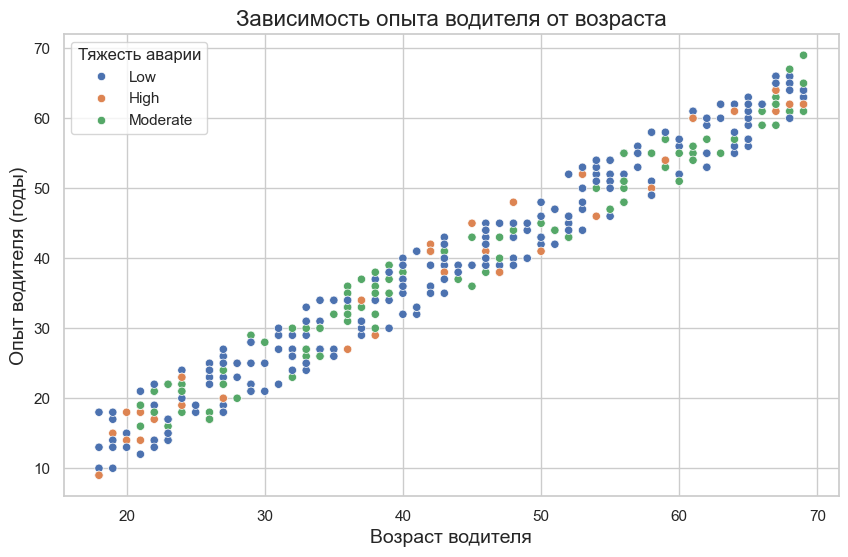

/var/folders/ml/970lk12n6vgbhmc3_y1j8z040000gn/T/ipykernel_78654/182108153.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Weather', y='Speed_Limit', palette='coolwarm')


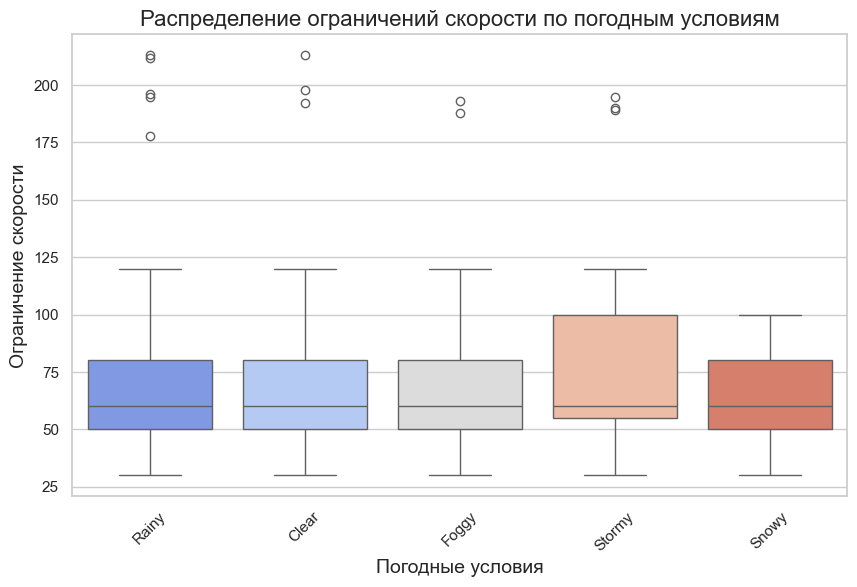

In [5]:

# 1. Бар-плот: Среднее ограничение скорости по типу дороги
plt.figure(figsize=(10,6))
avg_speed_by_road = df.groupby('Road_Type')['Speed_Limit'].mean().sort_values()
sns.barplot(x=avg_speed_by_road.index, y=avg_speed_by_road.values, palette='magma')
plt.title("Среднее ограничение скорости по типу дороги", fontsize=16)
plt.xlabel("Тип дороги", fontsize=14)
plt.ylabel("Среднее ограничение скорости", fontsize=14)
plt.xticks(rotation=45)
plt.show()
# Как читать: Этот график демонстрирует, как меняется среднее ограничение скорости для различных типов дорог.
# Более высокое значение может указывать на главные или автомагистрали, где разрешена большая скорость.

# 2. Count Plot: Распределение аварий по времени суток с разбиением по тяжести аварии
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Time_of_Day', hue='Accident_Severity', palette='viridis')
plt.title("Распределение аварий по времени суток", fontsize=16)
plt.xlabel("Время суток", fontsize=14)
plt.ylabel("Количество аварий", fontsize=14)
plt.legend(title='Тяжесть аварии')
plt.show()
# Как читать: График показывает, в какое время суток происходит больше аварий,
# а разбиение по цвету помогает увидеть, как распределяется тяжесть аварии в течение дня.

# 3. Violin Plot: Распределение опыта водителей по тяжести аварии
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Accident_Severity', y='Driver_Experience', palette='Set2')
plt.title("Распределение опыта водителей по тяжести аварии", fontsize=16)
plt.xlabel("Тяжесть аварии", fontsize=14)
plt.ylabel("Опыт водителя (годы)", fontsize=14)
plt.show()
# Как читать: Ширина «виолончели» показывает плотность распределения опыта водителей для каждой категории аварии.
# Это помогает сравнить, наблюдаются ли значимые различия в опыте между группами.


# 4. Scatter Plot: Зависимость опыта водителя от возраста с разбиением по тяжести аварии
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Driver_Age', y='Driver_Experience', hue='Accident_Severity', palette='deep')
plt.title("Зависимость опыта водителя от возраста", fontsize=16)
plt.xlabel("Возраст водителя", fontsize=14)
plt.ylabel("Опыт водителя (годы)", fontsize=14)
plt.legend(title='Тяжесть аварии')
plt.show()
# Как читать: График показывает взаимосвязь между возрастом и опытом водителя.
# Цветовая кодировка по тяжести аварии может помочь выявить, есть ли корреляция между возрастом, опытом и исходом аварии.


# 5. Box Plot: Ограничение скорости по погодным условиям
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Weather', y='Speed_Limit', palette='coolwarm')
plt.title("Распределение ограничений скорости по погодным условиям", fontsize=16)
plt.xlabel("Погодные условия", fontsize=14)
plt.ylabel("Ограничение скорости", fontsize=14)
plt.xticks(rotation=45)
plt.show()
# Как читать: Этот график демонстрирует, как изменяются ограничения скорости в зависимости от погодных условий.
# Можно сравнить медианные значения и увидеть наличие выбросов в каждой погодной категории.
